## Calculo de las tendencias por tienda para saber cuales tienen tendencia a la baja y cuales a la alza

In [205]:
#Se importan los paquetes necesarios
import pandas as pd
import numpy as np
from sklearn import linear_model
import datetime as datetime
import matplotlib.pyplot as plt

In [206]:
#Leer el df
df = pd.read_csv("Medicamentos2018.csv", delimiter=";")

In [207]:
#convertir el objeto en fecha y agrupar
df['Fecha'] = pd.to_datetime(df["Fecha"])
df["mes"] = df['Fecha'].map(lambda x: int(str(x).split('-')[1]))
df = df.groupby(['nombre_Sucursal', 'mes']).sum().reset_index()

In [178]:
#revisar el conteo unico
df['nombre_Sucursal'].nunique()

290

In [ ]:
#esta loop nos va a dar la tendencia con una regresión lineal
M = []
for tienda in df["nombre_Sucursal"].unique():
    tienda = 'Drog. Niza'
    dftemp = df[df["nombre_Sucursal"] == tienda]
    dftemp.sort_values(by = ["mes"], inplace = True)
    lin = linear_model.LinearRegression()
    dftemp.reset_index(drop = True, inplace = True)
    dftemp.reset_index(inplace = True)
    dftemp['index'] = dftemp['index'] + 1
    try:
        lin.fit(np.array(dftemp["mes"]).reshape(-1,1), dftemp["Venta_Neta"])
        M.append([tienda, lin.coef_])
    except: 
        print("Falla")
        M.append([tienda, 0,0])

In [209]:
#transformamos el resultado
df_pend = pd.DataFrame(M, columns = ["Drog", "Pendiente"])

In [219]:
#lo ordenamos por pendiente
df_pend = df_pend.sort_values(by="Pendiente")

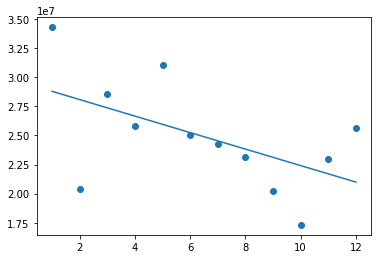

In [214]:
#exploramos los datos para saber si hacen sentido
plt.scatter(df.query("nombre_Sucursal == 'Drog. Niza'")['mes'], df.query("nombre_Sucursal == 'Drog. Niza'")['Venta_Neta'])
plt.plot(df.query("nombre_Sucursal == 'Drog. Niza'")['mes'], lin.predict(np.array(dftemp["mes"]).reshape(-1,1)))

In [228]:
#exportamos el df para pasarlo a power bi
df_pend.to_excel('tendencia.xlsx', index = True)

In [227]:
df_pend.reset_index(drop = True, inplace = True)
df_pend.reset_index(inplace = True)
df_pend

,index,Drog,Pendiente
0,0,Drog. Niza,[-708928.4965034962]
1,1,Drog. Mazurén,[-610629.8076923074]
2,2,Drog. Unicentro Occidente,[-486949.38111888105]
3,3,Drog. Tocancipá,[-482777.86013985996]
4,4,Drog. Dep. Zipaquirá,[-407483.0174825174]
...,...,...,...
275,275,Drog Plaza Central,[574088.4860139858]
276,276,Drog. CC Diver Plaza - Bogotá,[584530.2937062937]
277,277,Drog CC Titán Plaza,[759915.2657342656]
278,278,Drog CC Fontanar Chía,[1082473.367132867]
